In [1]:
import anndata as ad
import episcanpy as epi
import numpy as np
import episcanpy
print(episcanpy.__version__)
import matplotlib.pyplot as plt
import scanpy as sc
import time

# key parameters
nb_of_features = 100000
nb_pcs = 10
n_neighbors = 20
target_sum=None
min_cells =10
input_file = 'ATAC_mtx.h5ad'

# specify the directory where data are stored
DATADIR = '../../input/'

# specify the directory where data and metadata are stored
METADATADIR = '../../input/'

0.2.2+30.g44d02dc


In [2]:
# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')



# Load the raw count matrix + annotations/metadata

In [3]:
start = time.time()

In [4]:
# load the data, already as an adata object
adata =ad.read(DATADIR+input_file)
adata

AnnData object with n_obs × n_vars = 12178 × 385236
    uns: 'omic'

In [5]:
# save name of original cell name (bam file)
adata.obs['bam_file'] = adata.obs_names.tolist()

# format cell_names
barcodes = []
tissue = []
tmp_cell_names = []
for cell_names in adata.obs_names.tolist():
    tmp_cell_names.append("-".join(cell_names.split('/')[-1].split('.')[:2]))

    
# add annotations
adata.obs['barcodes'] = [name.split('-')[1] for name in tmp_cell_names]
adata.obs['tissue'] = [name.split('-')[0] for name in tmp_cell_names]
adata.obs['long_cell_names'] = tmp_cell_names
# rename the cells to only keep the cell barcode
adata.obs_names = [name.split('-')[1] for name in tmp_cell_names]

# load metadata
epi.pp.load_metadata(adata,
                     metadata_file='metadata.tsv',
                     path=METADATADIR,
                     separator='\t')
adata

AnnData object with n_obs × n_vars = 12178 × 385236
    obs: 'bam_file', 'barcodes', 'tissue', 'long_cell_names', 'Unnamed: 0', 'label'
    uns: 'omic'

        Or use epi.pp.density_features.
    


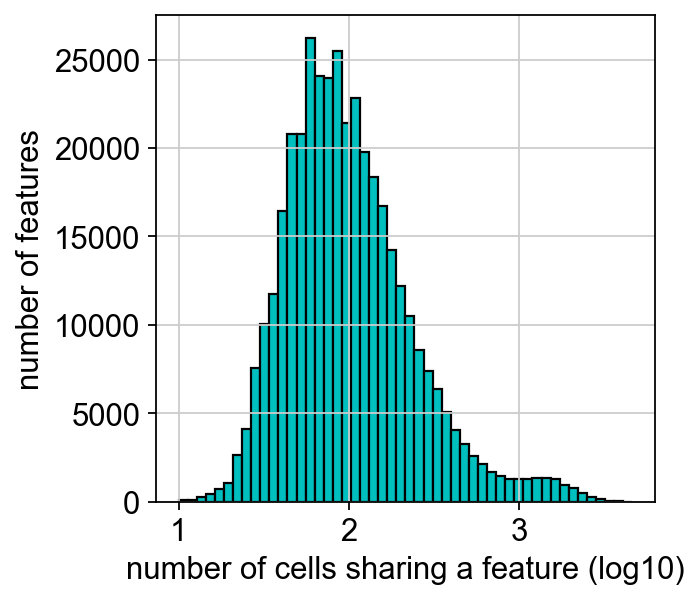

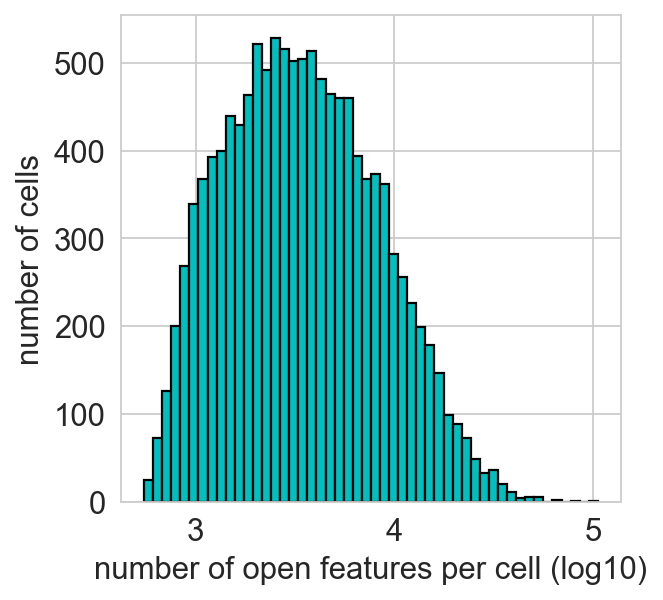

In [6]:
# Quality controls and Preliminary data processing
### remove empty cells and empty features
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=min_cells)

epi.pp.commonness_features(adata, binary=True, log=True)
epi.pp.coverage_cells(adata, binary=True, log=True)


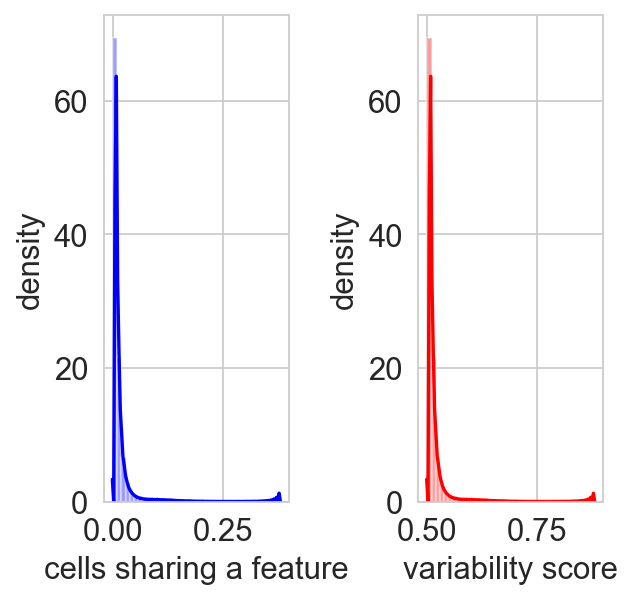

View of AnnData object with n_obs × n_vars = 12178 × 100013
    obs: 'bam_file', 'barcodes', 'tissue', 'long_cell_names', 'Unnamed: 0', 'label', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic'


        Or use epi.pp.density_features.
    
Trying to set attribute `.var` of view, copying.


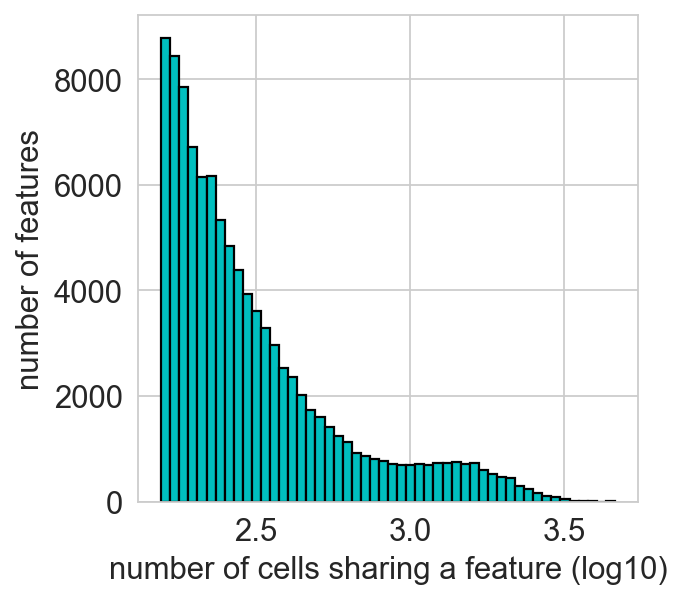

        Or use epi.pp.density_features.
    


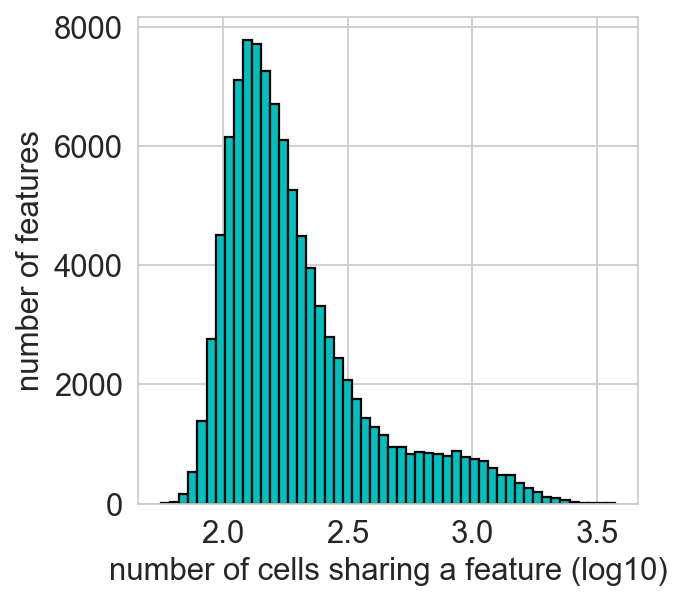

In [7]:
adatareduced = epi.pp.select_var_feature(adata, nb_features=nb_of_features, copy=True)
print(adatareduced)

epi.pp.commonness_features(adatareduced, binary=True, log=True)

epi.pp.normalize_total(adatareduced, target_sum=target_sum, exclude_highly_expressed=False,
 max_fraction=0.05, key_added=None, layers=None, layer_norm=None, inplace=True)
#sc.pp.log1p(adatareduced)

epi.pp.commonness_features(adatareduced, binary=True, log=True)

In [8]:
adatareduced

AnnData object with n_obs × n_vars = 12178 × 100013
    obs: 'bam_file', 'barcodes', 'tissue', 'long_cell_names', 'Unnamed: 0', 'label', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'omic'

# adatareduced

In [9]:
# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')


In [10]:
epi.pp.pca(adatareduced, n_comps=nb_pcs, svd_solver='arpack')
epi.pp.neighbors(adatareduced, n_neighbors=n_neighbors, n_pcs=nb_pcs)
epi.tl.umap(adatareduced)
#epi.tl.tsne(adatareduced)
epi.tl.louvain(adatareduced)

... storing 'tissue' as categorical
... storing 'label' as categorical


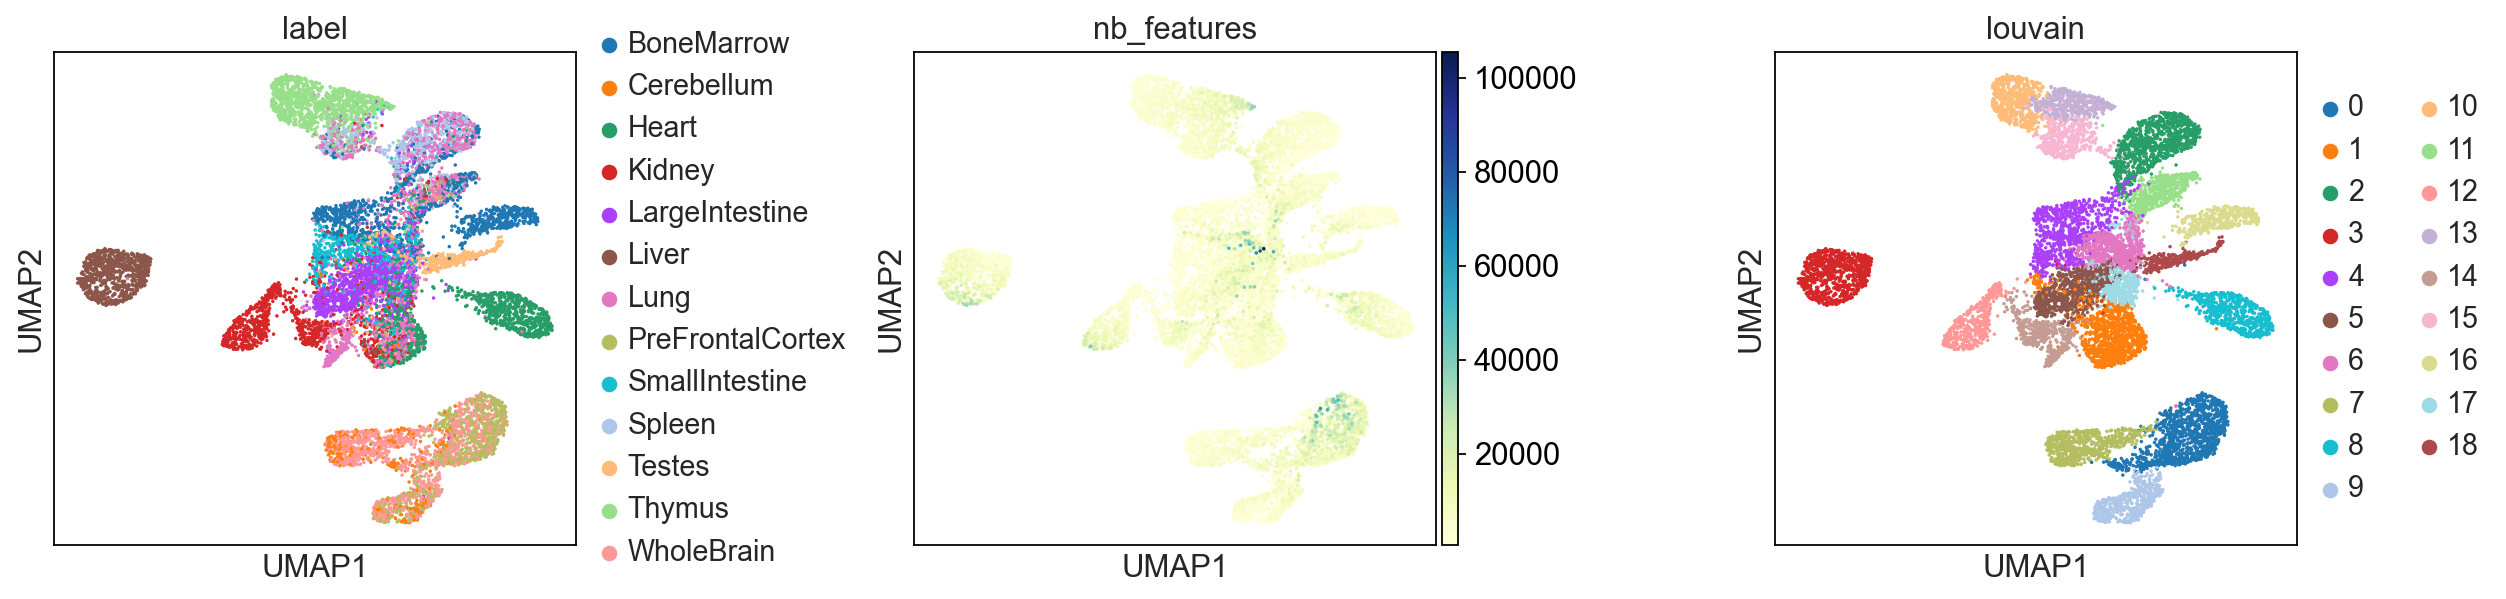

In [11]:
#sc.pl.pca(adatareduced, color=['label', 'nb_features', 'louvain'], wspace=0.5)
#sc.pl.tsne(adatareduced, color=['label', 'nb_features', 'louvain'], wspace=0.5)
sc.pl.umap(adatareduced, color=['label', 'nb_features', 'louvain'], wspace=0.5)

In [12]:
adatareduced.write('Cusanovich2018_subset_processed.h5ad')

In [13]:
end = time.time()
print((end-start)/60.0)

1.0760355512301127
